In [48]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import imageio
import torch.utils.data as Data

import datetime
import matplotlib.pyplot as plt

In [50]:
#Generating a data for training
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

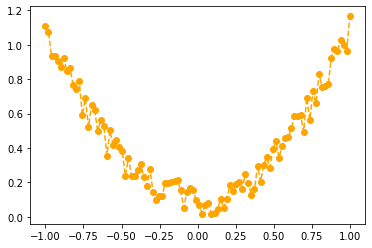

In [51]:
#Showing the generated Data
plt.plot(x, y, color='orange', marker='o', linestyle='dashed')

In [52]:
#Design a simple neural network with just a hidden layer 
class simple_net(nn.Module):
    def __init__(self, num_hidden, num_input = 1):
        super(simple_net, self).__init__()
        
        self.hiddenLayer = nn.Linear(num_input, num_hidden, bias = False)
        self.outPut = nn.Linear(num_hidden, 1, bias = False)
    
    def forward(self, x):
   
        x = F.relu(self.hiddenLayer(x))
        x = self.outPut(x)
        
        return x

In [53]:
#Create the network to train
t_net = simple_net(num_hidden = 10, num_input = 1)

optimizer = torch.optim.SGD(t_net.parameters(), lr=0.2)
loss_func = nn.MSELoss()

In [31]:
m = x.view(1, -1)
m.shape

torch.Size([1, 100])

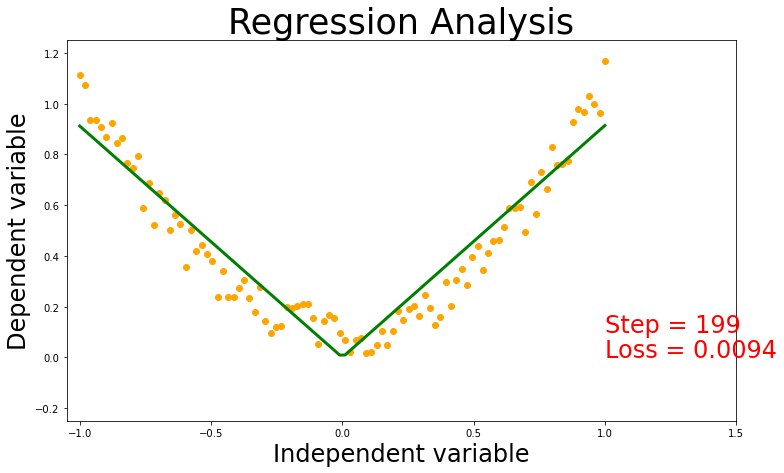

In [54]:
my_images = []
fig, ax = plt.subplots(figsize=(12,7))
                       
# train the network
for t in range(200):
  
    prediction = t_net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   


# save images as a gif    
imageio.mimsave('./curve_2.gif', my_images, fps=10)
    

In [189]:
#Generate 2D guassian data
data = (np.random.normal(0, 1, size = (100, 2, 2))).astype(np.double)
x_data = torch.from_numpy(data)
print(x_data[0])

y = torch.zeros([100, 1])
for i in range(0, 100):
    y[i] = torch.sum(x_data[i].pow(2))
    
y_data = y + 0.2*torch.rand((100, 1)) 

tensor([[-1.6025, -0.8794],
        [ 0.1271,  0.0744]], dtype=torch.float64)


In [185]:
m = data.astype(np.double())
m.dtype

dtype('float64')

In [116]:
yy = torch.zeros([100, 1])
xx = torch.zeros([100, 1])

for i in range(0, 100):
    xx[i] = x_data[i][0]
    yy[i] = x_data[i][1]

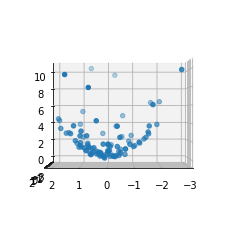

In [124]:
ax = plt.axes(projection = '3d')
ax.scatter3D(xx, yy, y_data)
ax.view_init(0, 90)
plt.show()

In [149]:
#Design a simple neural network with just a hidden layer 
class net(nn.Module):
    def __init__(self, num_hidden, num_input = 1):
        super(net, self).__init__()
        
        self.hiddenLayer = nn.Conv2d(num_input, num_hidden, 2)
        self.outPut = nn.Linear(num_hidden, 1, bias = False)
    
    def forward(self, x):
        
        x = x.unsqueeze(1)
        x = self.hiddenLayer(x)
        x = F.relu(x)
        x = self.outPut(x)
        
        return x

In [179]:
#Create the network to train
teacher_net = net(num_hidden = 100, num_input = 1)

optimizer = torch.optim.SGD(teacher_net.parameters(), lr=0.2)
loss_func = nn.MSELoss()

In [180]:
# train the network
for t in range(200):
  
    prediction = teacher_net(x_data)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    

RuntimeError: expected scalar type Double but found Float